#### PPGIA - Unifor - Prof. Daniel - Processamento e analise de imagens digitais - TrabalhoFinal04 - AdaIN-style

O AdaIN Style é usado para transferência de estilo entre pares de imagens de estilo de conteúdo arbitrário. Ao treinar uma rede e usar a normalização de instância Adaptiva, pode-se transferir o estilo entre qualquer par de imagens de estilo de conteúdo. Também pode-se controlar a força do estilo na imagem gerada durante o tempo de execução. Outra vantagem que o método oferece é a velocidade de inferência em relação aos outros modelos da época. 

O AdaIn Style segue uma arquitetura codificador-decodificador. O codificador f são as primeiras camadas pré-treinadas da rede. O codificador é fixo e não treinado. A normalização de instância adaptativa é realizada nas saídas do codificador.

f (c) ef (s) são os mapas de recursos produzidos pelo codificador para as imagens de conteúdo e estilo, respectivamente. O coeficiente de mistura α∈ [0,1] controla a força do estilo na imagem estilizada. α é definido como 1 durante o treinamento.

O decodificador g (⋅) é o reverso do codificador com o agrupamento substituído por 2x o aumento de escala do vizinho mais próximo. O decodificador é inicializado com pesos aleatórios e seus pesos são aprendidos. A imagem estilizada é obtida passando o mapa de feições transformado t para o gerador.

Existe uma função de perda, seu objetido é uma combinação de perda de estilo e conteúdo.

A saída AdaIN t é usada como o destino do conteúdo, pois ajuda o modelo a convergir mais rápido. 

In [1]:
!pip install numpy
!pip install Pillow
!pip install protobuf
!pip install six
!pip install tensorboardX
!pip install torch
!pip install torchvision
!pip install tqdm
!pip install --upgrade pillow

     |████████████████████████████████| 124 kB 8.4 MB/s 
     |████████████████████████████████| 3.1 MB 7.8 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import os
import io
import cv2
from PIL import Image
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
import moviepy.editor as mpy
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
from IPython import display as ipythondisplay
from IPython.display import Image as ipythonimage
%matplotlib inline

!git clone https://github.com/naoto0804/pytorch-AdaIN.git
%cd pytorch-AdaIN
!mkdir models
%cd /content/pytorch-AdaIN/models
!gdown https://drive.google.com/uc?id=108uza-dsmwvbW2zv-G73jtVcMU_2Nb7Y
!gdown https://drive.google.com/uc?id=1w9r1NoYnn7tql1VYG3qDUzkbIks24RBQ
%cd /content/pytorch-AdaIN

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2596864/45929032 bytes (5.7%)5840896/45929032 bytes (12.7%)8994816/45929032 bytes (19.6%)11853824/45929032 bytes (25.8%)14884864/45929032 bytes (32.4%)17899520/45929032 bytes (39.0%)21200896/45929032 bytes (46.2%)24379392/45929032 bytes (53.1%)27377664/45929032 bytes (59.6%)30408704/45929032 bytes (66.2%)33505280/45929032 bytes (73.0%)36610048/45929032 bytes (79.7%)

In [2]:
import numpy as np
import pandas as pd
import cv2 
print(cv2.__version__)
#Path Google Colab para CV2
from google.colab.patches import cv2_imshow
from google.colab import files
import dlib
from skimage import io
from PIL import Image 
%matplotlib inline
#A linha acima é necessária para mostrar gráficos Matplotlib dentro de um Notebook Jupyter
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import sys
import ipywidgets as widgets
from IPython.display import display
import scipy
from scipy import interpolate
#import face_recognition
import pickle
import gzip
from PIL import Image

4.1.2


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

Saving eu.jpg to eu.jpg
User uploaded file "eu.jpg" with length 26761 bytes


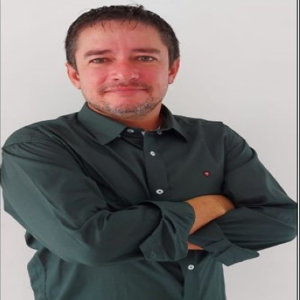

In [15]:
from PIL import Image
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
content_img = "content." + fn.split(".")[-1]
!mv -f $fn $content_img

im = Image.open(content_img)
(width, height) = im.size
content_img_max = max(width, height)
content_img_min = min(width, height)

display(Image.open(content_img).resize((300, 300)))

Saving Estilo.jpg to Estilo.jpg
User uploaded file "Estilo.jpg" with length 29495 bytes


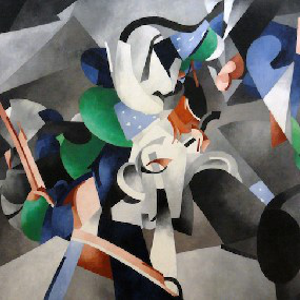

In [16]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
style_img = "style." + fn.split(".")[-1]
!mv -f $fn $style_img

im = Image.open(style_img)
(width, height) = im.size
style_img_max = max(width, height)
style_img_min = min(width, height)

display(Image.open(style_img).resize((300, 300)))

In [17]:
%%time
!rm -rf /content/pytorch-AdaIN/output/content_stylized_style.jpg
!CUDA_VISIBLE_DEVICES=0 python test.py --content $content_img --style $style_img --content_size $content_img_min --style_size $style_img_min
FINAL_IMAGE_PATH = '/content/pytorch-AdaIN/output/content_stylized_style.jpg'

CPU times: user 55.3 ms, sys: 19.1 ms, total: 74.5 ms
Wall time: 5.89 s


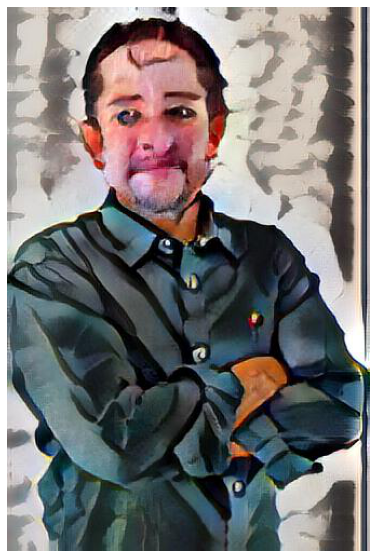

In [18]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.imshow(img)

In [19]:
files.download(FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>